In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def parse_train_line(line):
    pattern = r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) \| INFO \| train_inner \| epoch (\d{3}): *(\d+) / (\d+) loss=([0-9.e+-]+), nll_loss=([0-9.e+-]+), accuracy=([0-9.e+-]+), roc_auc_score_macro=([0-9.e+-]+), roc_auc_score_micro=([0-9.e+-]+), roc_auc_score_weighted=([0-9.e+-]+), roc_auc_score_samples=([0-9.e+-]+), f1_score_macro=(None|[0-9.e+-]+), f1_score_micro=(None|[0-9.e+-]+), f1_score_weighted=(None|[0-9.e+-]+), f1_score_samples=(None|[0-9.e+-]+), wps=([0-9.e+-]+), ups=([0-9.e+-]+), wpb=([0-9.e+-]+), bsz=([0-9.e+-]+), num_updates=(\d+), lr=([0-9.e+-]+), gnorm=([0-9.e+-]+), train_wall=(\d+), wall=(\d+)"
    match = re.match(pattern, line)
    if match:
        return {
            "timestamp": match.group(1),
            "epoch": int(match.group(2)),
            "current_step": int(match.group(3)),
            "total_steps": int(match.group(4)),
            "loss": try_parse_float(match.group(5)),
            "nll_loss": try_parse_float(match.group(6)),
            "accuracy": try_parse_float(match.group(7)),
            "roc_auc_score_macro": try_parse_float(match.group(8)),
            "roc_auc_score_micro": try_parse_float(match.group(9)),
            "roc_auc_score_weighted": try_parse_float(match.group(10)),
            "roc_auc_score_samples": try_parse_float(match.group(11)),
            "f1_score_macro": try_parse_float(match.group(12)),
            "f1_score_micro": try_parse_float(match.group(13)),
            "f1_score_weighted": try_parse_float(match.group(14)),
            "f1_score_samples": try_parse_float(match.group(15)),
            "wps": try_parse_float(match.group(16)),
            "ups": try_parse_float(match.group(17)),
            "wpb": try_parse_float(match.group(18)),
            "bsz": try_parse_float(match.group(19)),
            "num_updates": int(match.group(20)),
            "learning_rate": try_parse_float(match.group(21)),
            "gnorm": try_parse_float(match.group(22)),
            "train_wall": int(match.group(23)),
            "wall": int(match.group(24))
        }
    else:
        return None

def parse_valid_line(line):
    pattern = r"(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}) \| INFO \| valid \| epoch (\d{3}) \| valid on 'valid' subset \| loss ([0-9.e+-]+) \| nll_loss ([0-9.e+-]+) \| accuracy ([0-9.e+-]+) \| roc_auc_score_macro ([0-9.e+-]+) \| roc_auc_score_micro ([0-9.e+-]+) \| roc_auc_score_weighted ([0-9.e+-]+) \| roc_auc_score_samples ([0-9.e+-]+) \| f1_score_macro (None|[0-9.e+-]+) \| f1_score_micro (None|[0-9.e+-]+) \| f1_score_weighted (None|[0-9.e+-]+) \| f1_score_samples (None|[0-9.e+-]+) \| wps ([0-9.e+-]+) \| wpb ([0-9.e+-]+) \| bsz ([0-9.e+-]+) \| num_updates (\d+)"

    match = re.match(pattern, line)
    if match:
        return {
            "timestamp": match.group(1),
            "epoch": int(match.group(2)),
            "loss": try_parse_float(match.group(3)),
            "nll_loss": try_parse_float(match.group(4)),
            "accuracy": try_parse_float(match.group(5)),
            "roc_auc_score_macro": try_parse_float(match.group(6)),
            "roc_auc_score_micro": try_parse_float(match.group(7)),
            "roc_auc_score_weighted": try_parse_float(match.group(8)),
            "roc_auc_score_samples": try_parse_float(match.group(9)),
            "f1_score_macro": try_parse_float(match.group(10)),
            "f1_score_micro": try_parse_float(match.group(11)),
            "f1_score_weighted": try_parse_float(match.group(12)),
            "f1_score_samples": try_parse_float(match.group(13)),
            "wps": try_parse_float(match.group(14)),
            "wpb": try_parse_float(match.group(15)),
            "bsz": try_parse_float(match.group(16)),
            "num_updates": int(match.group(17)),
        }
    else:
        return None
def try_parse_float(value):
    try:
        return float(value)
    except ValueError:
        return None
        
def parse_log_file(file_path):
    parsed_train_data = []
    parsed_valid_data = []
    with open(file_path, 'r') as file:
        for line in file:
            parsed_train_line = parse_train_line(line)
            if parsed_train_line:
                parsed_train_data.append(parsed_train_line)

            parsed_valid_line = parse_valid_line(line)
            if parsed_valid_line:
                parsed_valid_data.append(parsed_valid_line)
    return pd.DataFrame(parsed_train_data), pd.DataFrame(parsed_valid_data)


train_df_full, valid_df = parse_log_file("train1.log")

train_df = train_df_full



In [2]:
train_df.head()

,timestamp,epoch,current_step,total_steps,loss,nll_loss,accuracy,roc_auc_score_macro,roc_auc_score_micro,roc_auc_score_weighted,...,f1_score_samples,wps,ups,wpb,bsz,num_updates,learning_rate,gnorm,train_wall,wall
0,2023-11-30 22:00:08,1,100,3260,2.006,1.003,12.1,0.498537,0.491865,0.497468,...,None,70.1,0.55,128.0,64.0,100,0.000001,1.822,182,188
1,2023-11-30 22:03:12,1,200,3260,1.938,0.969,60.9,0.490956,0.614712,0.490301,...,None,69.9,0.55,128.0,64.0,200,0.000003,1.095,183,371
2,2023-11-30 22:06:18,1,300,3260,1.919,0.960,61.9,0.507679,0.622362,0.508455,...,None,68.6,0.54,128.0,64.0,300,0.000004,0.897,186,557
3,2023-11-30 22:09:23,1,400,3260,1.930,0.965,60.4,0.554911,0.629968,0.556663,...,None,69.3,0.54,128.0,64.0,400,0.000005,0.950,184,742
4,2023-11-30 22:12:29,1,500,3260,1.886,0.943,62.8,0.575138,0.663163,0.575904,...,None,68.8,0.54,128.0,64.0,500,0.000006,1.118,185,928


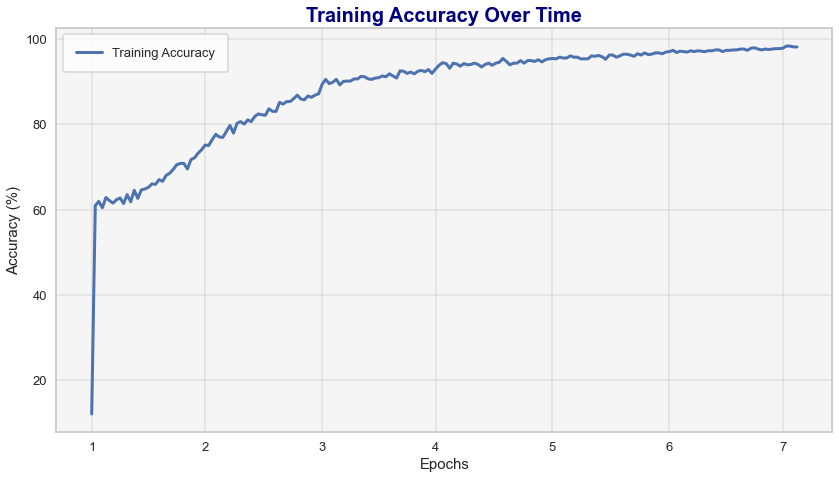

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 7))  
sns.set(style="whitegrid", context="talk")  


sns.lineplot(x=train_df.index, y=train_df['accuracy'], palette="viridis", linewidth=3, label="Training Accuracy")


epochs = train_df['epoch'].unique()
epoch_indices = train_df.drop_duplicates('epoch').index


plt.title('Training Accuracy Over Time', fontsize=20, fontweight='bold', color='navy') 
plt.ylabel('Accuracy (%)', fontsize=15)
plt.xlabel('Epochs', fontsize=15)


plt.xticks(epoch_indices, epochs, rotation=0)  
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.tick_params(axis='both', which='major', length=6, color='grey', width=1.5)

plt.gca().set_facecolor('#f5f5f5')


plt.grid(True, linestyle='-', alpha=0.5)


plt.legend(frameon=True, fontsize=13, loc='upper left', borderpad=1)


plt.tight_layout()
plt.show()
plt.savefig('training_accuracy_plot.png', format='png', dpi=300, bbox_inches='tight')




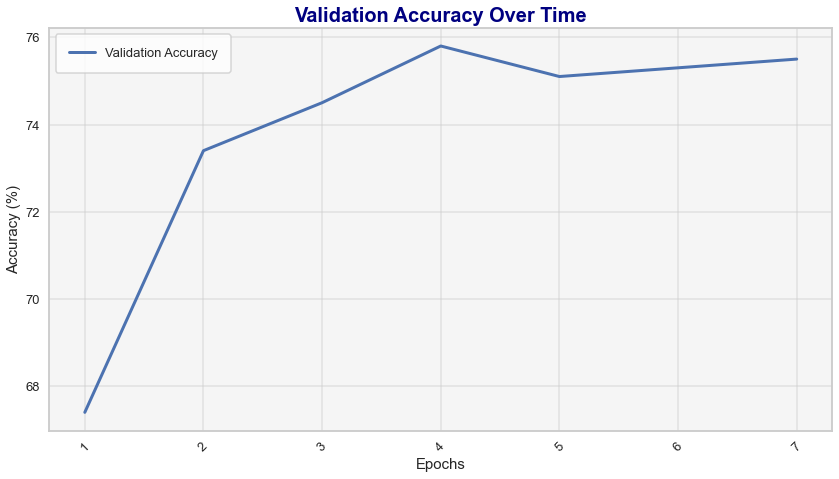

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 7))  
sns.set(style="whitegrid", context="talk")  


sns.lineplot(x=valid_df.index, y=valid_df['accuracy'], palette="viridis", linewidth=3, label="Validation Accuracy")


epochs = valid_df['epoch'].unique()
epoch_indices = valid_df.drop_duplicates('epoch').index


plt.title('Validation Accuracy Over Time', fontsize=20, fontweight='bold', color='navy')  # Enhanced title styling
plt.ylabel('Accuracy (%)', fontsize=15)
plt.xlabel('Epochs', fontsize=15)


plt.xticks(epoch_indices, epochs, rotation=45)  
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.tick_params(axis='both', which='major', length=6, color='grey', width=1.5)


plt.gca().set_facecolor('#f5f5f5')


plt.grid(True, linestyle='-', alpha=0.5)


plt.legend(frameon=True, fontsize=13, loc='upper left', borderpad=1)


plt.tight_layout()
plt.show()
plt.savefig('validation_accuracy_plot.png', format='png', dpi=300, bbox_inches='tight')



200


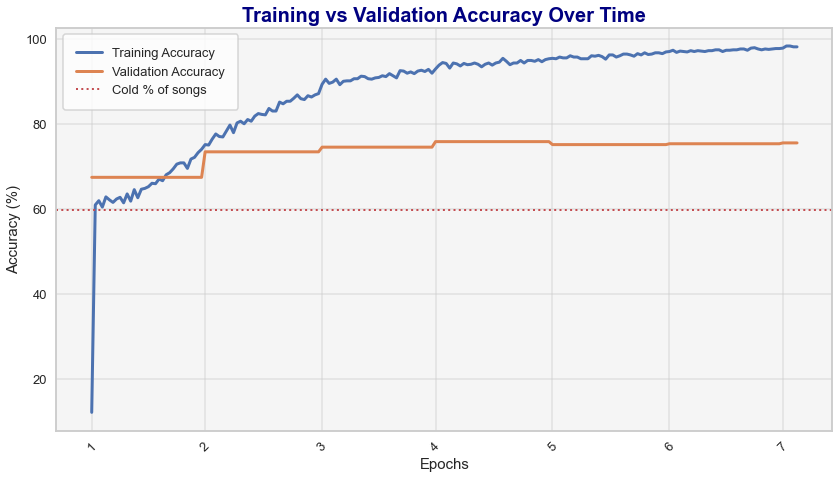

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

valid_df_aligned_list = []



for index, row in train_df.iterrows():

    matching_row = valid_df[valid_df['epoch'] == row['epoch']]


    valid_df_aligned_list.append(matching_row.iloc[0])

valid_df = pd.DataFrame(valid_df_aligned_list)
print(len(valid_df))


plt.figure(figsize=(12, 7))
sns.set(style="whitegrid", context="talk")


sns.lineplot(x=train_df.index, y=train_df['accuracy'], palette="viridis", linewidth=3, label="Training Accuracy")


sns.lineplot(x=train_df.index, y=valid_df['accuracy'], palette="viridis", linewidth=3, label="Validation Accuracy")



epochs = train_df['epoch'].unique()  
epoch_indices = train_df.drop_duplicates('epoch').index  

# Customizing the plot
plt.title('Training vs Validation Accuracy Over Time', fontsize=20, fontweight='bold', color='navy')
plt.ylabel('Accuracy (%)', fontsize=15)
plt.xlabel('Epochs', fontsize=15)


plt.xticks(epoch_indices, epochs, rotation=45)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.axhline(y=59.6, color='r', linestyle='dotted', linewidth=2, label='Cold % of songs')


plt.tick_params(axis='both', which='major', length=6, color='grey', width=1.5)

plt.gca().set_facecolor('#f5f5f5')

plt.grid(True, linestyle='-', alpha=0.5)

plt.legend(frameon=True, fontsize=13, loc='upper left', borderpad=1)

plt.tight_layout()
plt.show()
plt.savefig('training_vs_validation_accuracy_plot.png', format='png', dpi=300, bbox_inches='tight')


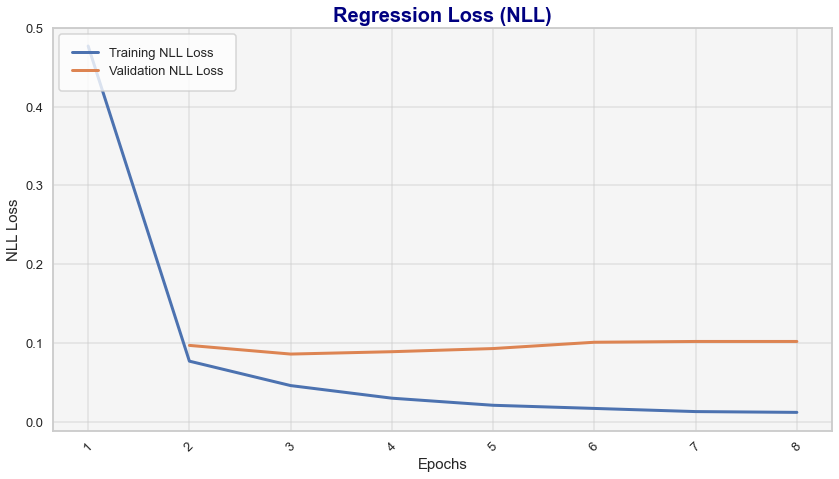

In [8]:



plt.figure(figsize=(12, 7))
sns.set(style="whitegrid", context="talk")


sns.lineplot(x='epoch', y='accuracy', data=train_df, palette="viridis", linewidth=3, label="Training NLL Loss")


sns.lineplot(x='epoch', y='accuracy', data=valid_df, palette="viridis", linewidth=3, label="Validation NLL Loss")


plt.title('Regression Loss (NLL)', fontsize=20, fontweight='bold', color='navy')
plt.ylabel('NLL Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)

plt.xticks(epochs, rotation=45, fontsize=13)
plt.yticks(fontsize=13)

plt.tick_params(axis='both', which='major', length=6, color='grey', width=1.5)

plt.gca().set_facecolor('#f5f5f5')

plt.grid(True, linestyle='-', alpha=0.5)

plt.legend(frameon=True, fontsize=13, loc='upper left', borderpad=1)

plt.tight_layout()


plt.show()
